<a href="https://colab.research.google.com/github/jose-luis-dev/Alura-Store/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [321]:
#Importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [322]:
# Se carga el archivo para trabajar con la data
data = pd.read_json('/content/TelecomX_Data.json')

#Se realiza una vista de la data
data.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [324]:
# Se valida a detalle las caracteristicas de la data
print(f"Numero de fila y columnas: {data.shape}\n")
print("***************************************")
print(f"Nombres de filas: {data.index}\n")
print("***************************************")
print(f"Nombres de columnas: {data.columns}\n")
print("***************************************\n")
data.info()

Numero de fila y columnas: (7267, 6)

***************************************
Nombres de filas: RangeIndex(start=0, stop=7267, step=1)

***************************************
Nombres de columnas: Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

***************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#### El resultado de la data indica que tenemos 6 columnas y 4 de ellas esta anidadas. El siguiente proceso es extraer la información de las columnas

In [325]:
customer = pd.json_normalize(data['customer'])
phone = pd.json_normalize(data['phone'])
internet = pd.json_normalize(data['internet'])
account = pd.json_normalize(data['account'])

#Se procede a unir las columnas al df
data = pd.concat([data, customer, phone, internet, account], axis=1)

data.sample(5)

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
3404,4713-ZBURT,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,No,Yes,...,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),99.70,4634.35
2962,4114-QMKVN,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,No,No,Yes,One year,No,Bank transfer (automatic),68.75,3815.4
19,0023-HGHWL,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,No,No,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.10,25.1
398,0568-ONFPC,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,Yes,Yes,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.90,135
6791,9367-OIUXP,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.70,73.05


In [326]:
#Se elimina las columnas anidadas que se encuentran en el df

data = data.drop(['customer', 'phone', 'internet', 'account'], axis=1)

#Se valida el resultado
data.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
914,1293-BSEUN,No,Female,0,Yes,Yes,72,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.70,1482.3
657,0932-YIXYU,No,Female,0,No,No,47,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,1029.8
6177,8461-EFQYM,No,Female,0,No,No,38,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,24.25,914.4
4984,6818-WOBHJ,Yes,Female,1,Yes,No,68,Yes,Yes,Fiber optic,...,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),89.60,6127.6
1210,1729-VLAZJ,No,Female,0,No,Yes,10,No,No phone service,DSL,...,Yes,No,Yes,No,No,One year,No,Mailed check,40.25,411.45


In [328]:
# Revision de columnas
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'PaymentMethod']:
    print(f"{col}: {data[col].unique()}")

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
PaperlessBilling: ['Yes' 'No']
Churn: ['No' 'Yes' '']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [332]:
# Reemplazar cadenas vacias en la columna "Churn" por "No Info" usando .loc
data.loc[data['Churn'] == '', 'Churn'] = 'No Info'

#Validamos el resultado de la columna
data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
No Info,224


#🔧 Transformación

#### Esta etapa se trabajará en la identificación de las variables importantes para el análisis de evasión de clientes.

#### 1. Explorar las columnas de la data y verificar sus tipos de datos.
#### 2. Consultar el diccionario para compreder mejor el sig. de cada variable.
#### 3. Identificar las columnas relevantes para dicho análisis.

In [340]:
# Información de las columnas de la data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   object 
 8   MultipleLines     7256 non-null   object 
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   object 
 11  OnlineBackup      7256 non-null   object 
 12  DeviceProtection  7256 non-null   object 
 13  TechSupport       7256 non-null   object 
 14  StreamingTV       7256 non-null   object 
 15  StreamingMovies   7256 non-null   object 
 16  Contract          7256 non-null   object 
 17  

#### El analisis general se detecta que: Columna Charges.Total es tipo objet, sin embargo el tipo de dato capturado es tipo float.

In [341]:
# Se revisa el contenido de la columna Charges.Total
data['Charges.Total'].value_counts()

,count
Charges.Total,
202.0,11
1955.0,9
1975.0,9
199.0,9
1965.0,8
...,...
16208.0,1
7655.0,1
628725.0,1


In [342]:
# Reemplazos de formato
data['Charges.Total'] = data['Charges.Total'].apply(lambda x: x.replace('.', '') if isinstance(x, str) else x)
data['Charges.Total'] = data['Charges.Total'].apply(lambda x: x.replace(' ', '') if isinstance(x, str) else x)
data['Charges.Total'] = data['Charges.Total'].apply(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

# Reemplazar cadenas vacías por NaN
data['Charges.Total'] = data['Charges.Total'].replace('', np.nan)

# Convertir a float
try:
    data['Charges.Total'] = data['Charges.Total'].astype(float)
    print("La columna 'Charges.Total' ha sido convertida exitosamente a tipo float.")
except ValueError as e:
    print(f"Error al convertir a float: {e}")

# Verificar
print("Conversion completa. Nulos encontrados:", data['Charges.Total'].isnull().sum())


La columna 'Charges.Total' ha sido convertida exitosamente a tipo float.
Conversion completa. Nulos encontrados: 0


In [336]:
# Los datos Nulos se eliminan para no afectar los calculos.
data = data[data['Charges.Total'].notna()]

# Segunda validacion de datos nulos
print("Conversion completa. Nulos encontrados:", data['Charges.Total'].isnull().sum())

Conversion completa. Nulos encontrados: 0


In [344]:
data['Charges.Total'].value_counts()

,count
Charges.Total,
202.0,11
1955.0,9
1975.0,9
199.0,9
1965.0,8
...,...
16208.0,1
7655.0,1
628725.0,1


In [345]:
print(data.columns)

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')


In [349]:
# Evitar divisiones por cero
data = data[data['Charges.Total'] != 0]

# Crear la columna de gasto diario con el nombre "Cuentas_Diarias"
data['Cuentas_Diarias'] = (data['Charges.Total'] / data['tenure']) / 30

# Verificamos los cambios solicitados
print(data[['Charges.Total', 'tenure', 'Cuentas_Diarias']].sample(10))

      Charges.Total  tenure  Cuentas_Diarias
2724       178135.0      20       296.891667
6686        29598.0      56        17.617857
5241       127565.0      12       354.347222
5081          336.0       2         5.600000
2636        30216.0      36        27.977778
4584        19106.0      22        28.948485
283        652665.0      58       375.094828
6494       218755.0      25       291.673333
629         34345.0       8       143.104167
4987       469295.0      48       325.899306


In [352]:
# Se realiza el redondeo de los resultados
data['Cuentas_Diarias'] = data['Cuentas_Diarias'].round(3)

# Verificamos los cambios solicitados
print(data[['Charges.Total', 'tenure', 'Cuentas_Diarias']].head(12))

    Charges.Total  tenure  Cuentas_Diarias
0          5933.0       9           21.974
1          5424.0       9           20.089
2         28085.0       4          234.042
3        123785.0      13          317.397
4          2674.0       3           29.711
5         57145.0       9          211.648
6        790425.0      71          371.092
7         53778.0      63           28.454
8         34035.0       7          162.071
9         59579.0      65           30.553
10       246055.0      54          151.886
11       845675.0      72          391.516


In [353]:
# Validaciones finales

# Validar que la informacion no haya inf ni NaN en la columna Cuentas_Diarias
print(f"Datos nulos encontrados: ", data['Cuentas_Diarias'].isnull().sum())
print((data['Cuentas_Diarias'] == float('inf')).sum())


Datos nulos encontrados:  0
0


In [354]:
data['Cuentas_Diarias'].describe()

,Cuentas_Diarias
count,7256.000000
mean,119.308636
std,122.104487
min,0.521000
25%,21.637000
50%,57.655000
75%,237.159500
max,402.101000


In [355]:
# Se realiza el reemplazo de las variables Yes/ No  a 1/0 para futuros análisis cuantitativos o de modelado.
bin_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']

for col in bin_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

In [356]:
data.rename(columns={
    'tenure': 'Meses_Cliente',
    'MonthlyCharges': 'Cargos_Mensuales',
    'Charges.Total': 'Cargos_Totales',
    'Contract': 'Tipo_Contrato',
    'PaymentMethod': 'Metodo_Pago',
    'Churn': 'Evasion',
    'gender': 'Genero'
}, inplace=True)


In [357]:
data['Tipo_Contrato'].replace({
    'Month-to-month': 'Mes a mes',
    'One year': 'Un año',
    'Two year': 'Dos años'
}, inplace=True)


/tmp/ipython-input-2367756763.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Tipo_Contrato'].replace({


In [360]:
data.sample(5)

,customerID,Evasion,Genero,SeniorCitizen,Partner,Dependents,Meses_Cliente,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tipo_Contrato,PaperlessBilling,Metodo_Pago,Charges.Monthly,Cargos_Totales,Cuentas_Diarias
4225,5808-TOTXO,0.0,Female,0,0,1,3,1,No,No,...,NaN,NaN,NaN,NaN,Un año,1,Credit card (automatic),20.55,574.0,6.378
1576,2242-MFOTG,0.0,Male,0,0,0,33,1,Yes,Fiber optic,...,0.0,0.0,0.0,0.0,Un año,0,Bank transfer (automatic),80.10,26033.0,26.296
2014,2845-AFFTX,1.0,Male,1,1,0,41,1,Yes,Fiber optic,...,1.0,0.0,1.0,1.0,Mes a mes,1,Electronic check,99.80,42593.0,34.628
6707,9236-NDUCW,0.0,Female,0,0,0,21,0,No phone service,DSL,...,0.0,1.0,0.0,0.0,Dos años,0,Mailed check,35.10,7704.0,12.229
4583,6283-GITPX,0.0,Male,0,0,1,71,1,No,DSL,...,1.0,1.0,1.0,0.0,Dos años,1,Credit card (automatic),76.90,55227.0,25.928


### Explorar los datos para encontrar patrones, relaciones, distribuciones e insights que expliquen el comportamiento del "Churn".

In [363]:
data.describe(include='all')

,customerID,Evasion,Genero,SeniorCitizen,Partner,Dependents,Meses_Cliente,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tipo_Contrato,PaperlessBilling,Metodo_Pago,Charges.Monthly,Cargos_Totales,Cuentas_Diarias
count,7256,7032.000000,7256,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256,7256,...,5681.000000,5681.000000,5681.000000,5681.000000,7256,7256.000000,7256,7256.000000,7256.000000,7256.000000
unique,7256,NaN,2,NaN,NaN,NaN,NaN,NaN,3,3,...,NaN,NaN,NaN,NaN,3,NaN,4,NaN,NaN,NaN
top,9995-HOTOH,NaN,Male,NaN,NaN,NaN,NaN,NaN,No,Fiber optic,...,NaN,NaN,NaN,NaN,Mes a mes,NaN,Electronic check,NaN,NaN,NaN
freq,1,NaN,3669,NaN,NaN,NaN,NaN,NaN,3490,3198,...,NaN,NaN,NaN,NaN,4005,NaN,2445,NaN,NaN,NaN
mean,NaN,0.265785,NaN,0.1629,0.483600,0.299063,32.395535,0.902839,NaN,NaN,...,0.437775,0.369653,0.490407,0.495511,NaN,0.593716,NaN,64.755423,126342.563534,119.308636
std,NaN,0.441782,NaN,0.3693,0.499765,0.457879,24.558067,0.296197,NaN,NaN,...,0.496157,0.482753,0.499952,0.500024,NaN,0.491173,NaN,30.125739,193017.805646,122.104487
min,NaN,0.000000,NaN,0.0000,0.000000,0.000000,1.000000,0.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,18.250000,19.000000,0.521000
25%,NaN,0.000000,NaN,0.0000,0.000000,0.000000,9.000000,1.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,35.450000,7545.000000,21.637000
50%,NaN,0.000000,NaN,0.0000,0.000000,0.000000,29.000000,1.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,70.300000,36435.000000,57.655000
75%,NaN,1.000000,NaN,0.0000,1.000000,1.000000,55.000000,1.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,89.900000,142570.000000,237.159500


### Se realiza la traducción de los datos y las columnas para mostración entendible

In [367]:

# Traducción de género
data['Genero'] = data['Genero'].replace({
    'Male': 'Hombre',
    'Female': 'Mujer'
})

# Traducción de tipo de contrato
data['Tipo_Contrato'] = data['Tipo_Contrato'].replace({
    'Month-to-month': 'Mes a mes',
    'One year': 'Un año',
    'Two year': 'Dos años'
})

# Traducción de método de pago
data['Metodo_Pago'] = data['Metodo_Pago'].replace({
    'Electronic check': 'Cheque electrónico',
    'Mailed check': 'Cheque por correo',
    'Bank transfer (automatic)': 'Transferencia bancaria automática',
    'Credit card (automatic)': 'Tarjeta de crédito automática'
})

# Traducción de líneas múltiples
data['MultipleLines'] = data['MultipleLines'].replace({
    'No': 'No',
    'Yes': 'Sí',
    'No phone service': 'Sin servicio telefónico'
})

# Traducción de tipo de internet
data['InternetService'] = data['InternetService'].replace({
    'DSL': 'DSL',
    'Fiber optic': 'Fibra óptica',
    'No': 'Sin internet'
})


In [368]:
for col in ['Genero', 'Tipo_Contrato', 'Metodo_Pago', 'MultipleLines', 'InternetService']:
    print(f"{col}: {data[col].unique()}")

Genero: ['Mujer' 'Hombre']
Tipo_Contrato: ['Un año' 'Mes a mes' 'Dos años']
Metodo_Pago: ['Cheque por correo' 'Cheque electrónico' 'Tarjeta de crédito automática'
 'Transferencia bancaria automática']
MultipleLines: ['No' 'Sí' 'Sin servicio telefónico']
InternetService: ['DSL' 'Fibra óptica' 'Sin internet']


In [369]:
data.sample(5)

,customerID,Evasion,Genero,SeniorCitizen,Partner,Dependents,Meses_Cliente,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tipo_Contrato,PaperlessBilling,Metodo_Pago,Charges.Monthly,Cargos_Totales,Cuentas_Diarias
1553,2223-GDSHL,0.0,Hombre,0,1,1,71,1,Sí,Fibra óptica,...,1.0,1.0,1.0,1.0,Dos años,1,Transferencia bancaria automática,116.05,82975.0,38.955
3705,5117-IFGPS,0.0,Hombre,1,1,0,29,1,Sí,Fibra óptica,...,0.0,0.0,0.0,1.0,Mes a mes,1,Cheque electrónico,84.30,235775.0,271.006
4261,5857-XRECV,0.0,Mujer,0,0,1,2,1,No,Sin internet,...,NaN,NaN,NaN,NaN,Un año,0,Transferencia bancaria automática,20.50,3825.0,63.750
660,0939-YAPAF,1.0,Mujer,0,0,0,35,1,Sí,Fibra óptica,...,1.0,0.0,1.0,1.0,Mes a mes,1,Cheque electrónico,100.25,35276.0,33.596
4094,5606-AMZBO,0.0,Mujer,0,1,0,10,1,Sí,Fibra óptica,...,0.0,0.0,0.0,0.0,Mes a mes,1,Tarjeta de crédito automática,78.15,76515.0,255.050


#📊 Carga y análisis

#### Objetivo: Calcular medidas estadísticas que ayuden a conocer mejor la distribución general de los datos numeros de la data.

In [370]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Evasion,7032.0,0.265785,0.441782,0.000,0.000,0.000,1.0000,1.000
SeniorCitizen,7256.0,0.162900,0.369300,0.000,0.000,0.000,0.0000,1.000
Partner,7256.0,0.483600,0.499765,0.000,0.000,0.000,1.0000,1.000
Dependents,7256.0,0.299063,0.457879,0.000,0.000,0.000,1.0000,1.000
Meses_Cliente,7256.0,32.395535,24.558067,1.000,9.000,29.000,55.0000,72.000
PhoneService,7256.0,0.902839,0.296197,0.000,1.000,1.000,1.0000,1.000
OnlineSecurity,5681.0,0.365077,0.481494,0.000,0.000,0.000,1.0000,1.000
OnlineBackup,5681.0,0.440063,0.496438,0.000,0.000,0.000,1.0000,1.000
DeviceProtection,5681.0,0.437775,0.496157,0.000,0.000,0.000,1.0000,1.000
TechSupport,5681.0,0.369653,0.482753,0.000,0.000,0.000,1.0000,1.000


In [374]:
# Mediana para variables numéricas
data[['Meses_Cliente', 'Charges.Monthly','Cargos_Totales','Cuentas_Diarias' ]].median()
# Valores únicos de columnas categóricas para entender su distribución
data.select_dtypes(include='object').nunique()

,0
customerID,7256
Genero,2
MultipleLines,3
InternetService,3
Tipo_Contrato,3
Metodo_Pago,4


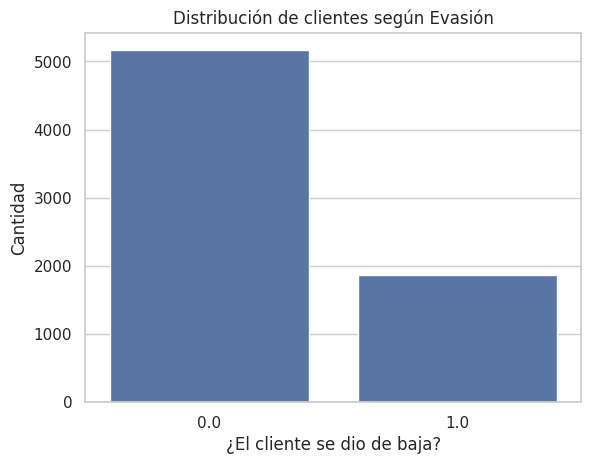

,proportion
Evasion,
0.0,0.734215
1.0,0.265785


In [376]:
sns.countplot(data=data, x='Evasion')
plt.title('Distribución de clientes según Evasión')
plt.xlabel('¿El cliente se dio de baja?')
plt.ylabel('Cantidad')
plt.show()


data['Evasion'].value_counts(normalize=True)

In [377]:
# Se extrae la columna que necesitamos para el análisis
datos_evasion = data['Evasion']
datos_evasion.info()

<class 'pandas.core.series.Series'>
Index: 7256 entries, 0 to 7266
Series name: Evasion
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 113.4 KB


In [378]:
# Convertir la serie a DataFrame con el nombre de la columna Explicita.
df_datos_evasion = datos_evasion.to_frame(name='Evasion')

df_datos_evasion['Evasion']

,Evasion
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
7262,0.0
7263,1.0
7264,0.0
7265,0.0


In [379]:
Evasion_total = df_datos_evasion['Evasion'].value_counts()
Evasion_total

,count
Evasion,
0.0,5163
1.0,1869


In [380]:
#Covertir la serie a DataFrame con nombre de la columna explicita
df_evasion_total = Evasion_total.to_frame(name='Total').reset_index()
df_evasion_total

,Evasion,Total
0,0.0,5163
1,1.0,1869


In [381]:
def generar_grafico(palette):
  fig, ax = plt.subplots(figsize=(10, 4))
  ax.set(xticklabels=[])

  ax = sns.barplot(data=df_evasion_total, x=df_evasion_total['Total'], y=df_evasion_total['Evasion'], hue=df_evasion_total.index, orient='h', palette=palette, legend=False)
  ax.set_title('Cantidad de Cliente Perdidos',
                loc='left', fontsize=16, pad=30)
  ax.set_xlabel('Número Cliente Perdidos', fontsize = 14)
  ax.set_ylabel('')

  sns.despine()

  for i, j in enumerate(df_evasion_total['Total']):
    ax.text(j+20, i, str(j), color='black', fontsize=12, fontweight='bold', ha='left', va='center')
  plt.show()


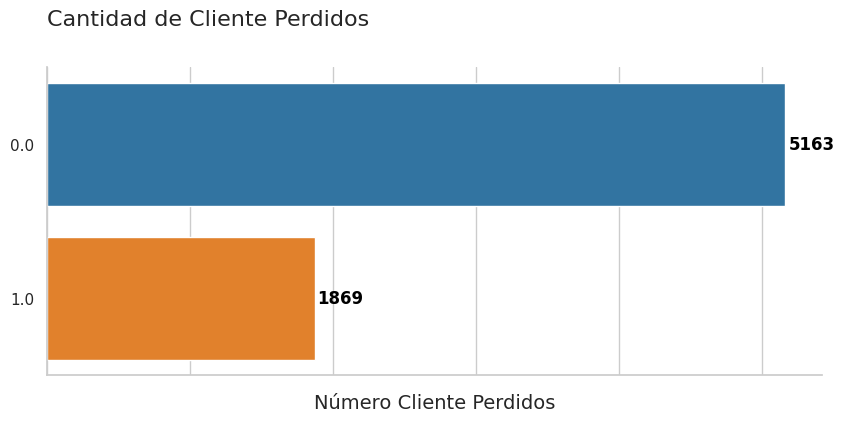

In [382]:
sns.set_theme(style="whitegrid")
generar_grafico('tab10')

In [406]:
cat_vars = ['Genero', 'Partner', 'Dependents', 'InternetService', 'Tipo_Contrato', 'Metodo_Pago']

for col in cat_vars:
    print(f"\n===== Tabla de Evasión según {col} =====\n")

    # Tabla con totales y porcentajes
    tabla = pd.crosstab(data[col], data['Evasion'], margins=True, margins_name='Total')
    tabla_pct = pd.crosstab(data[col], data['Evasion'], normalize='index') * 100
    display(tabla)
    display(tabla_pct.round(2))


===== Tabla de Evasión según Genero =====



Evasion,0.0,1.0,Total
Genero,,,
Hombre,2619,930,3549
Mujer,2544,939,3483
Total,5163,1869,7032


Evasion,0.0,1.0
Genero,,
Hombre,73.80,26.20
Mujer,73.04,26.96



===== Tabla de Evasión según Partner =====



Evasion,0.0,1.0,Total
Partner,,,
0,2439,1200,3639
1,2724,669,3393
Total,5163,1869,7032


Evasion,0.0,1.0
Partner,,
0,67.02,32.98
1,80.28,19.72



===== Tabla de Evasión según Dependents =====



Evasion,0.0,1.0,Total
Dependents,,,
0,3390,1543,4933
1,1773,326,2099
Total,5163,1869,7032


Evasion,0.0,1.0
Dependents,,
0,68.72,31.28
1,84.47,15.53



===== Tabla de Evasión según InternetService =====



Evasion,0.0,1.0,Total
InternetService,,,
DSL,1957,459,2416
Fibra óptica,1799,1297,3096
Sin internet,1407,113,1520
Total,5163,1869,7032


Evasion,0.0,1.0
InternetService,,
DSL,81.00,19.00
Fibra óptica,58.11,41.89
Sin internet,92.57,7.43



===== Tabla de Evasión según Tipo_Contrato =====



Evasion,0.0,1.0,Total
Tipo_Contrato,,,
Dos años,1637,48,1685
Mes a mes,2220,1655,3875
Un año,1306,166,1472
Total,5163,1869,7032


Evasion,0.0,1.0
Tipo_Contrato,,
Dos años,97.15,2.85
Mes a mes,57.29,42.71
Un año,88.72,11.28



===== Tabla de Evasión según Metodo_Pago =====



Evasion,0.0,1.0,Total
Metodo_Pago,,,
Cheque electrónico,1294,1071,2365
Cheque por correo,1296,308,1604
Tarjeta de crédito automática,1289,232,1521
Transferencia bancaria automática,1284,258,1542
Total,5163,1869,7032


Evasion,0.0,1.0
Metodo_Pago,,
Cheque electrónico,54.71,45.29
Cheque por correo,80.80,19.20
Tarjeta de crédito automática,84.75,15.25
Transferencia bancaria automática,83.27,16.73


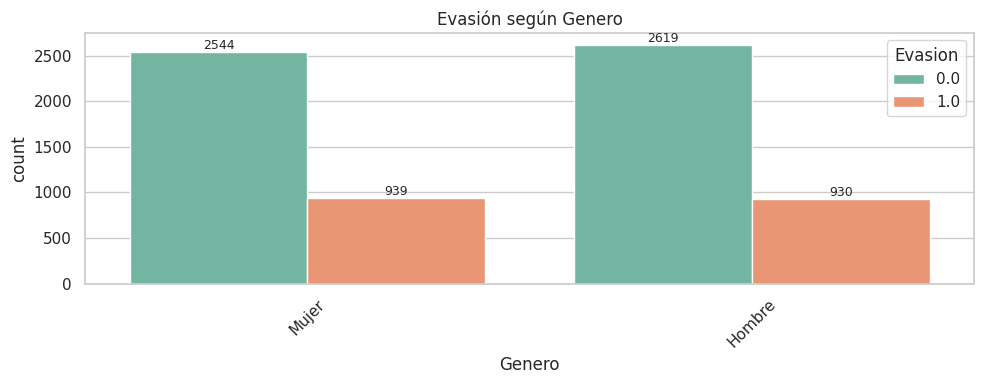

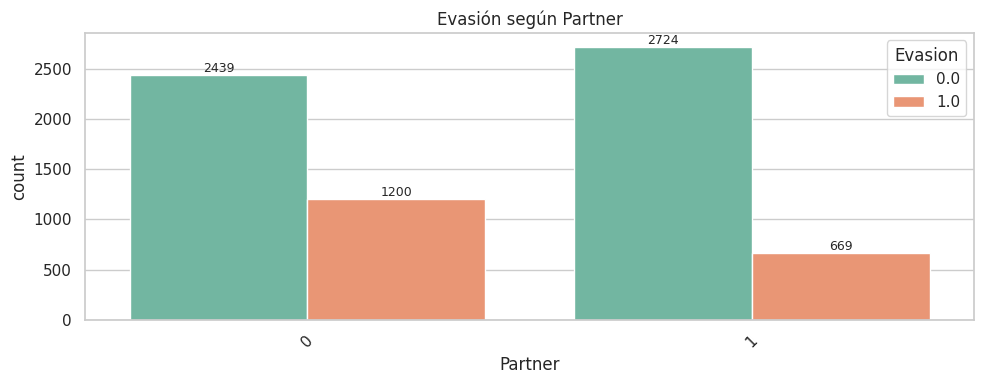

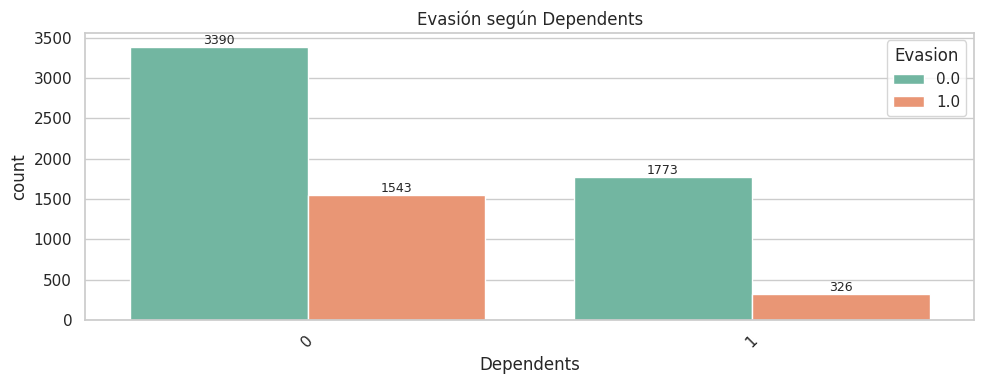

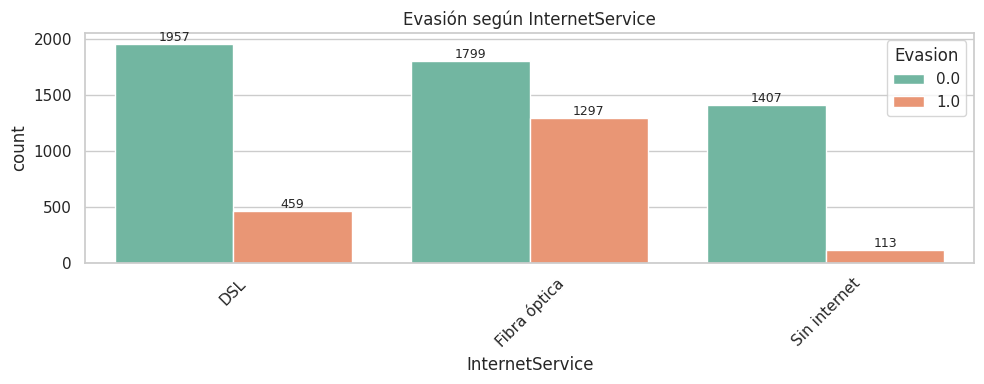

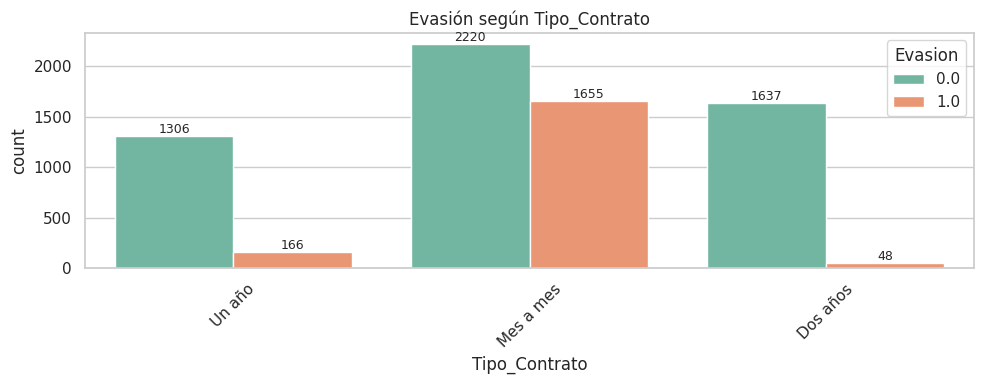

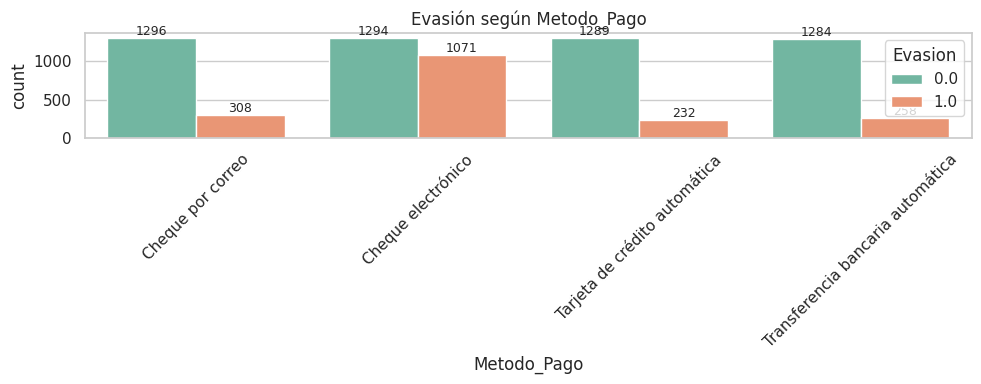

In [401]:
cat_vars = ['Genero', 'Partner', 'Dependents', 'InternetService', 'Tipo_Contrato', 'Metodo_Pago']

for col in cat_vars:
    plt.figure(figsize=(10,4))
    ax = sns.countplot(data=data, x=col, hue='Evasion', palette='Set2')  # Mejora visual
    plt.title(f'Evasión según {col}')
    plt.xticks(rotation=45)

    # Agregar valores encima de las barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

    plt.tight_layout()
    plt.show()



<Axes: xlabel='Metodo_Pago'>

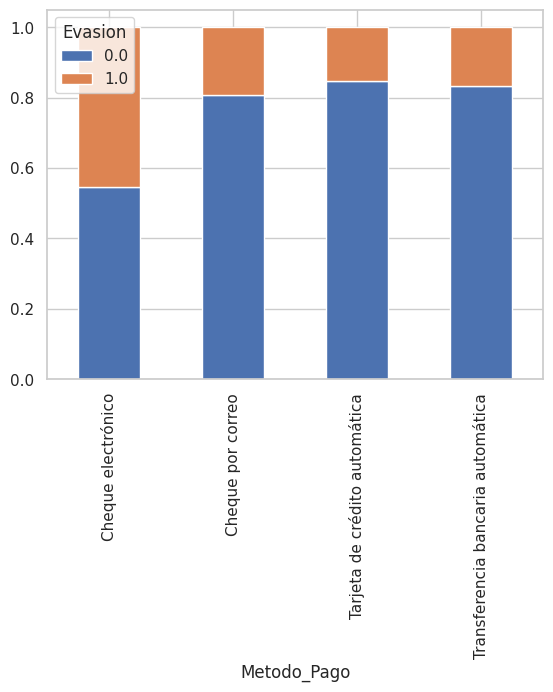

In [388]:
# Proporción por categoría
pd.crosstab(data[col], data['Evasion'], normalize='index').plot(kind='bar', stacked=True)

/tmp/ipython-input-3944622387.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Evasion', y=col, palette='Set3')


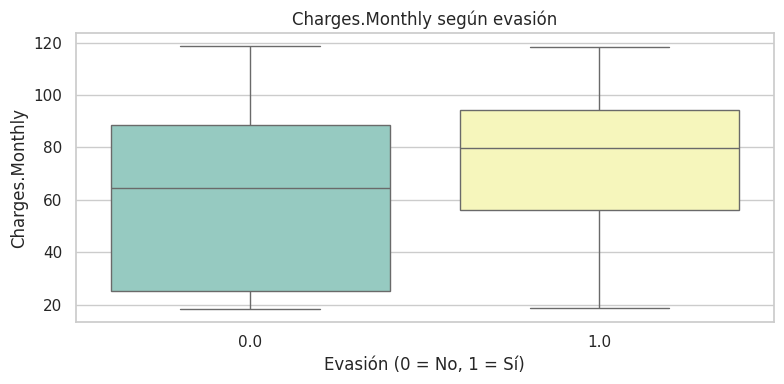

/tmp/ipython-input-3944622387.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Evasion', y=col, palette='Set3')


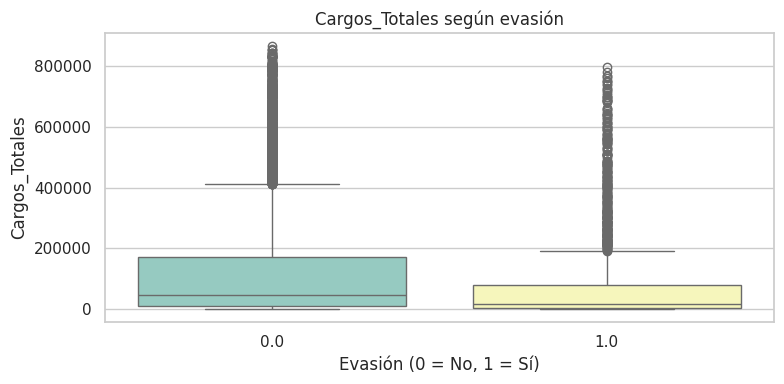

/tmp/ipython-input-3944622387.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Evasion', y=col, palette='Set3')


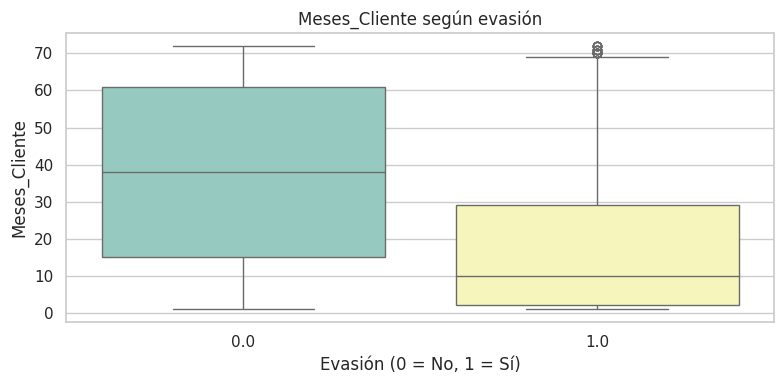

In [389]:
num_vars = ['Charges.Monthly', 'Cargos_Totales', 'Meses_Cliente']

for col in num_vars:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=data, x='Evasion', y=col, palette='Set3')
    plt.title(f'{col} según evasión')
    plt.xlabel('Evasión (0 = No, 1 = Sí)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


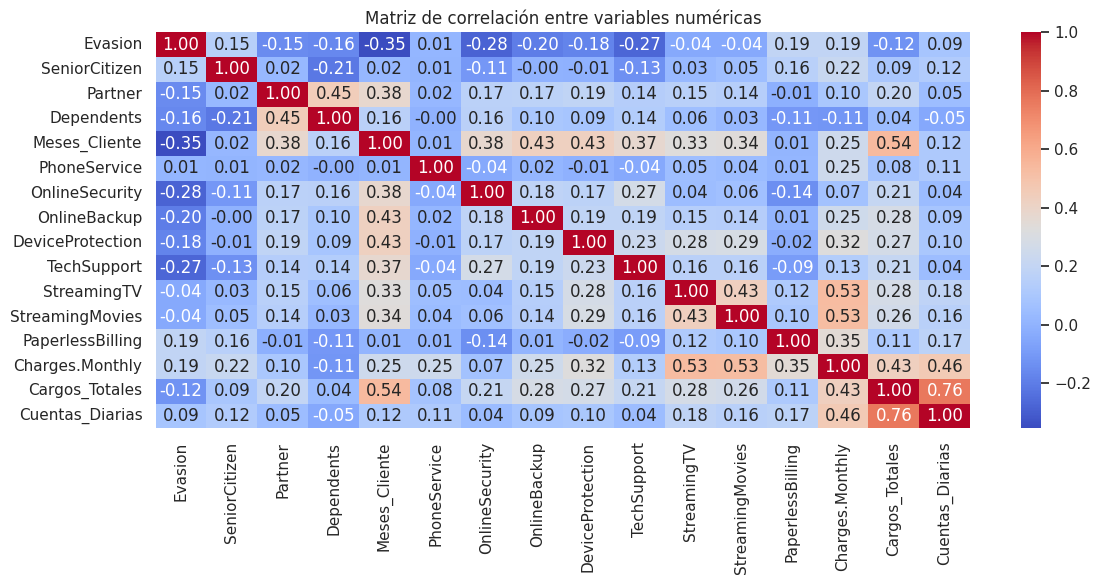

In [392]:
import numpy as np

plt.figure(figsize=(12,6))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()


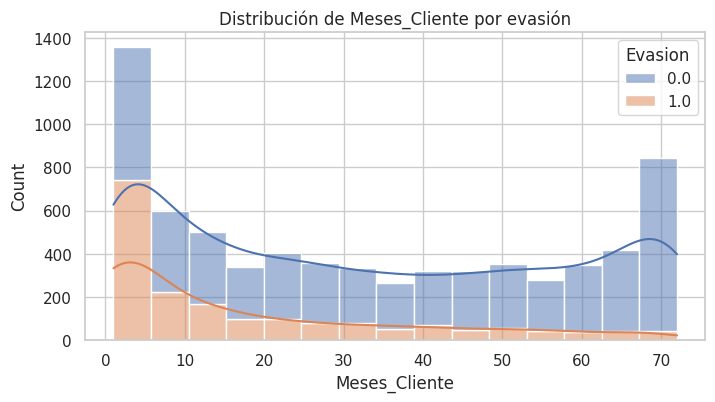

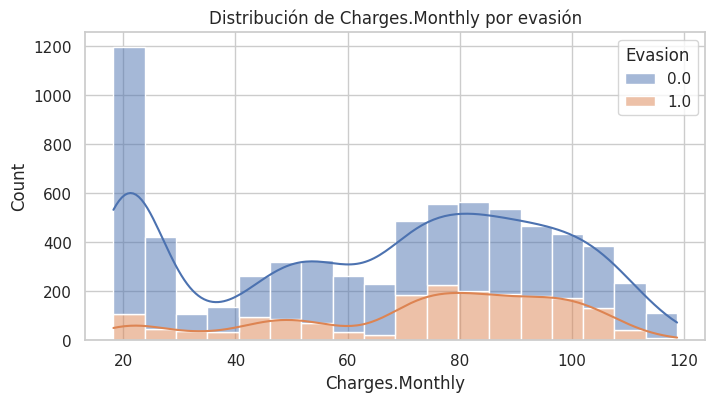

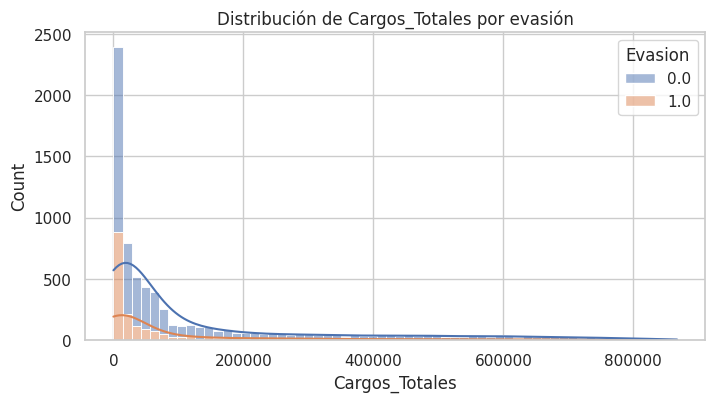

In [393]:
num_vars = ['Meses_Cliente', 'Charges.Monthly', 'Cargos_Totales']
for col in num_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=col, hue='Evasion', kde=True, multiple='stack')
    plt.title(f'Distribución de {col} por evasión')
    plt.show()


#📄Informe final